In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("dataset_output/libras_ufop/libras_ufop_openpose.csv")

In [5]:
df

,category,video_name,frame,hand_0_0_x,hand_0_0_y,hand_0_0_z,hand_0_1_x,hand_0_1_y,hand_0_1_z,hand_0_2_x,...,pose_22_z,pose_23_x,pose_23_y,pose_23_z,pose_24_x,pose_24_y,pose_24_z,missing_hand,missing_face,person
0,1,p1_c1_s1_0,0,0.555807,0.567531,0.394245,0.549136,0.575092,0.414851,0.543798,...,0.753184,0.433065,0.966341,0.781661,0.449489,0.928342,0.651774,False,False,1.0
1,1,p1_c1_s1_0,1,0.555086,0.561309,0.396433,0.547985,0.570326,0.402954,0.542236,...,0.751818,0.433051,0.966384,0.792620,0.449503,0.930953,0.673173,False,False,1.0
2,1,p1_c1_s1_0,2,0.552441,0.554763,0.376937,0.544950,0.563844,0.328017,0.539501,...,0.721404,0.431155,0.966412,0.771990,0.449501,0.928337,0.667928,False,False,1.0
3,1,p1_c1_s1_0,3,0.540484,0.558278,0.014662,0.539830,0.565252,0.043459,0.532311,...,0.745815,0.433046,0.966367,0.777363,0.449523,0.928312,0.661847,False,False,1.0
4,1,p1_c1_s1_0,4,0.539812,0.537244,0.100900,0.534094,0.548904,0.083215,0.531067,...,0.697552,0.433064,0.966390,0.749232,0.449475,0.930948,0.649300,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202484,47,p5_c4_s9_10,36,0.511064,0.446786,0.026157,0.538449,0.420391,0.030119,0.526901,...,0.752672,0.424943,0.955436,0.677236,0.439216,0.898344,0.543393,False,False,5.0
202485,47,p5_c4_s9_10,37,0.539804,0.431748,0.028773,0.541779,0.429114,0.030089,0.534208,...,0.725757,0.424950,0.950097,0.681652,0.437225,0.901135,0.545763,False,False,5.0
202486,47,p5_c4_s9_10,38,0.542277,0.441707,0.030453,0.542592,0.434997,0.080483,0.521517,...,0.722870,0.426986,0.952731,0.657443,0.435220,0.898388,0.555769,False,False,5.0
202487,47,p5_c4_s9_10,39,0.540754,0.450658,0.036463,0.534091,0.436443,0.065288,0.541753,...,0.716687,0.424990,0.952775,0.658890,0.437217,0.901061,0.537380,False,False,5.0


In [61]:
df_video = df[df["video_name"] == "001_001_001.mp4"]
video_frames = df_video["frame"].max()
print(video_frames)
frames_diff = video_frames - target_frames
print(frames_diff)
frames_to_remove = [i for i in range(0, video_frames, video_frames//(video_frames-target_frames))]
# frames_to_remove = [video_frames]
frames_to_remove = frames_to_remove[(len(frames_to_remove) - frames_diff - 1):]
# if len(frames_to_remove) < frames_diff:
#     frames_to_remove += [i for i in range(0, len(frames_to_remove) - frames_diff)]
print(frames_to_remove)
new_df = df_video[~df_video["frame"].isin(frames_to_remove)]
new_df

87
-33
[]


,Unnamed: 0,category,video_name,frame,hand_0_0_x,hand_0_0_y,hand_0_0_z,hand_0_1_x,hand_0_1_y,hand_0_1_z,...,pose_22_y,pose_22_z,pose_23_x,pose_23_y,pose_23_z,pose_24_x,pose_24_y,pose_24_z,missing_hand,missing_face
0,0,1,001_001_001.mp4,0,0.559302,0.943834,0.361916,0.539392,0.984436,0.072649,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
1,1,1,001_001_001.mp4,1,0.557995,0.944853,0.363025,0.538670,0.990662,0.072256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
2,2,1,001_001_001.mp4,2,0.557992,0.945950,0.366478,0.539255,0.989671,0.074984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
3,3,1,001_001_001.mp4,3,0.557876,0.945462,0.389607,0.538725,0.984666,0.079201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
4,4,1,001_001_001.mp4,4,0.557848,0.945605,0.395565,0.538737,0.980610,0.080987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,83,1,001_001_001.mp4,83,0.558347,0.945418,0.398738,0.541337,0.978682,0.123547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
84,84,1,001_001_001.mp4,84,0.558335,0.944465,0.403318,0.541895,0.983771,0.116143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
85,85,1,001_001_001.mp4,85,0.558347,0.944437,0.400255,0.541910,0.983735,0.116103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
86,86,1,001_001_001.mp4,86,0.558266,0.944817,0.405364,0.541950,0.986827,0.097616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False


<Axes: >

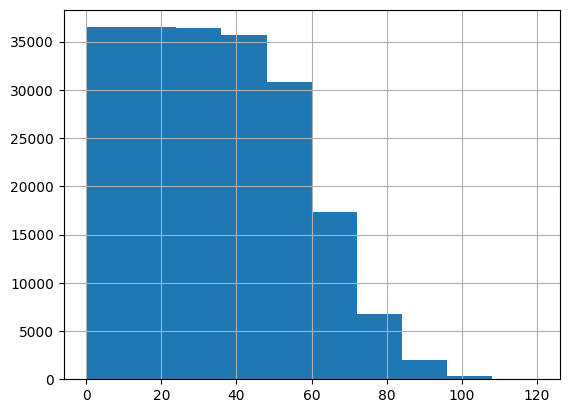

In [6]:
df["frame"].hist()

In [7]:
df["category"].unique()

array([ 1, 10,  2,  3,  4,  5,  6,  7,  8,  9, 11, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 12, 30, 13, 14, 15, 16, 17, 18, 19, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 40, 41, 42,
       43, 44, 45, 46, 47])

<Axes: >

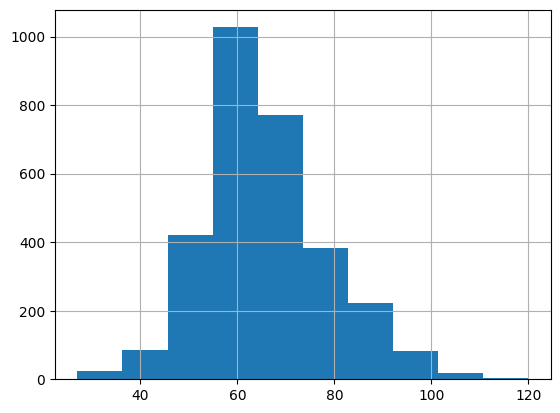

In [8]:
df.groupby("video_name")["frame"].max().hist()

In [9]:
df.groupby("video_name")["frame"].max()

video_name
p1_c1_s10_0    57
p1_c1_s10_1    65
p1_c1_s10_2    52
p1_c1_s10_3    65
p1_c1_s10_4    60
               ..
p5_c4_s9_5     62
p5_c4_s9_6     58
p5_c4_s9_7     62
p5_c4_s9_8     59
p5_c4_s9_9     57
Name: frame, Length: 3040, dtype: int64

In [10]:
df.groupby("video_name")["frame"].max().min()

27

In [12]:
target_frames = 60

In [13]:
df_new_fps = pd.DataFrame(columns=df.columns)
for video_name in df["video_name"].unique():
    df_video = df[df["video_name"] == video_name]
    video_frames = len(df_video)
    if video_frames == target_frames:
        new_df = df_video
    else:
        if video_frames < target_frames:
            new_df = df_video
            last_frame = df_video[df_video["frame"] == video_frames - 1]
            frames_count = target_frames - video_frames
            new_df = pd.concat([last_frame] * frames_count)
            new_df["frame"] = np.arange(video_frames, target_frames)
            new_df = pd.concat([df_video, new_df])
        else:
            frames_diff = video_frames - target_frames
            frames_to_remove = [i for i in range(0, video_frames, video_frames//(video_frames-target_frames))]
            if len(frames_to_remove) > frames_diff:
                frames_to_remove = frames_to_remove[:frames_diff]
            if len(frames_to_remove) < frames_diff:
                print("frames diff menor")
            new_df = df_video[~df_video["frame"].isin(frames_to_remove)]
            if len(new_df) > target_frames:
                new_df = new_df.iloc[:target_frames]
            if len(new_df) < target_frames:
                print("menor")
                break
    df_new_fps = pd.concat([df_new_fps, new_df])

In [14]:
df_new_fps

,category,video_name,frame,hand_0_0_x,hand_0_0_y,hand_0_0_z,hand_0_1_x,hand_0_1_y,hand_0_1_z,hand_0_2_x,...,pose_22_z,pose_23_x,pose_23_y,pose_23_z,pose_24_x,pose_24_y,pose_24_z,missing_hand,missing_face,person
1,1,p1_c1_s1_0,1,0.555086,0.561309,0.396433,0.547985,0.570326,0.402954,0.542236,...,0.751818,0.433051,0.966384,0.792620,0.449503,0.930953,0.673173,False,False,1.0
2,1,p1_c1_s1_0,2,0.552441,0.554763,0.376937,0.544950,0.563844,0.328017,0.539501,...,0.721404,0.431155,0.966412,0.771990,0.449501,0.928337,0.667928,False,False,1.0
3,1,p1_c1_s1_0,3,0.540484,0.558278,0.014662,0.539830,0.565252,0.043459,0.532311,...,0.745815,0.433046,0.966367,0.777363,0.449523,0.928312,0.661847,False,False,1.0
4,1,p1_c1_s1_0,4,0.539812,0.537244,0.100900,0.534094,0.548904,0.083215,0.531067,...,0.697552,0.433064,0.966390,0.749232,0.449475,0.930948,0.649300,False,False,1.0
5,1,p1_c1_s1_0,5,0.530725,0.526807,0.142478,0.524336,0.534430,0.150466,0.517610,...,0.727615,0.433072,0.966384,0.772875,0.449477,0.928342,0.647910,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202488,47,p5_c4_s9_10,55,0.522440,0.436927,0.275950,0.533989,0.446403,0.045277,0.532805,...,0.705954,0.426990,0.950059,0.665721,0.437205,0.898362,0.538676,False,False,5.0
202488,47,p5_c4_s9_10,56,0.522440,0.436927,0.275950,0.533989,0.446403,0.045277,0.532805,...,0.705954,0.426990,0.950059,0.665721,0.437205,0.898362,0.538676,False,False,5.0
202488,47,p5_c4_s9_10,57,0.522440,0.436927,0.275950,0.533989,0.446403,0.045277,0.532805,...,0.705954,0.426990,0.950059,0.665721,0.437205,0.898362,0.538676,False,False,5.0
202488,47,p5_c4_s9_10,58,0.522440,0.436927,0.275950,0.533989,0.446403,0.045277,0.532805,...,0.705954,0.426990,0.950059,0.665721,0.437205,0.898362,0.538676,False,False,5.0


In [15]:
df_new_fps["category"].value_counts()

category
26    3960
21    3720
12    3660
11    3600
22    3600
25    3540
55    3540
24    3480
30    3480
34    3480
29    3480
13    3420
38    3360
49    3360
57    3360
33    3360
14    3360
15    3300
16    3300
19    3300
27    3300
35    3300
32    3300
31    3240
36    3240
50    3240
56    3240
41    3240
47    3240
10    3240
17    3240
23    3240
18    3240
3     3180
5     3120
28    3120
46    3120
37    3120
8     3120
39    3120
45    3120
44    3120
2     3120
40    3060
4     3060
52    3060
54    3060
53    3060
1     3060
51    3000
42    3000
43    3000
48    3000
9     3000
6     2940
7     2880
Name: count, dtype: int64

In [16]:
df_new_fps["category"].unique()

array([1, 10, 2, 3, 4, 5, 6, 7, 8, 9, 11, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 12, 30, 13, 14, 15, 16, 17, 18, 19, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 40, 41, 42, 43, 44,
       45, 46, 47], dtype=object)

In [17]:
len(df_new_fps["category"].unique())

56

In [18]:
grouped_count = df_new_fps.groupby("video_name")["frame"].count()

In [19]:
grouped_count[grouped_count > target_frames]

Series([], Name: frame, dtype: int64)

In [20]:
grouped_count[grouped_count < target_frames]

Series([], Name: frame, dtype: int64)

In [21]:
video_names = list(grouped_count[grouped_count > target_frames].index)
for video_name in video_names:
    df_video = df_new_fps[df_new_fps["video_name"] == video_name]
    extra_frames = len(df_video) - target_frames
    frames_to_remove = df_video.iloc[-extra_frames:]
    df_new_fps = df_new_fps.drop(frames_to_remove.index)

In [22]:
len(df_new_fps.video_name.unique()) * target_frames

182400

In [23]:
df_new_fps.groupby("video_name")["frame"].count()

video_name
p1_c1_s10_0    60
p1_c1_s10_1    60
p1_c1_s10_2    60
p1_c1_s10_3    60
p1_c1_s10_4    60
               ..
p5_c4_s9_5     60
p5_c4_s9_6     60
p5_c4_s9_7     60
p5_c4_s9_8     60
p5_c4_s9_9     60
Name: frame, Length: 3040, dtype: int64

In [24]:
df_new_fps.to_csv(f"dataset_output/libras_ufop/libras_ufop_openpose_60_frames.csv", index=False)